## Question :
The goal of this problem is for you to explore how to properly analyze, visualize, split, clean and format data and perform linear regression, polynomial regression and regularization. You will use the happiness data (e.g. happiness data.csv) located here Download here. The data consists of the following attributes:

*Country nam*e: name of the country
*Year*: year data was collected

*Life ladder*: information about how happy people are

*Log GDP per capita*: market values of goods and services in a country

*Social support*: how people feel they are supported by those around them

*Healthy life expectancy*: rank of the country based on the happiness score

*Freedom to make life choices*: how much freedom contributes to one’s feeling of happiness

*Generosity*: have you donated money

*Perceptions of corruption*: how do people perceive that there is corruption

*Positive affect*: do you feel happiness, laughter and enjoyment?

*Negative affect*: do you feel worry, anger or sadness?

Your task is to build a model that given attributes/features: Country name, Log GDP per capita, Social support, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect and Negative affect,
Healthy life expectancy predicts Life ladder (note that this means that you can ignore Year).

In [1]:
#Lets import all the necessary packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
#read our happniess data as a pandas data frame
df = pd.read_csv("./happiness_data.csv")
#print the dimension
print("\n The shape of the dataframe is " , df.shape)
#print all columns
print("\n The columns that are present in the dataframe" , df.columns)
#view the first 5 rows of the datafram
print("\n The first five rows of the dataframe :" )
df.head(5)


 The shape of the dataframe is  (1949, 11)

 The columns that are present in the dataframe Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

 The first five rows of the dataframe :


Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.518            0.258  
1                      0.850            0.584            0.237  
2                      0.707            0.618            0.275  
3                      0.731            0.611            0.267  
4                      0.776            0.710            0.268

Question A:
1. How much data is present ?
Answer : The dataset consists of 1949 rows and 11 columns in total.
2. What attributes/features are continuous valued? Answer : The features [ 'Life Ladder', 'Log GDP per capita','Social support', 'Healthy life expectancy at birth','Freedom to make life choices', 'Generosity','Perceptions of corruption', 'Positive affect', 'Negative affect'] are continuous valued.
3. Which attributes are categorical? : Answer : The features ['Country name', 'year'] are categorical values



In [3]:
#helper function for continuous columns
def draw_plot_univariate_cont(column):
  print(f"Statistical summary of {column}:\n\n",df[column].describe())
  print("---------------------------------")
  print("Missing values: %f\n" % df[column].isnull().sum())
  print("Mean: %f\n" % df[column].mean())
  print("Median: %f \n" % df[column].median())
  print("Skewness: %f\n" % df[column].skew())
  print("Kurtosis: %f\n" % df[column].kurt())
  print("---------------------------------")
  sns.histplot(df[str(column)],kde="True")

Question B : Answer
1. Visualization and summary statisitcs is printed below for each column along with the kind of special treatment they require.

Statistical summary of Life Ladder:

 count    1949.000000
mean        5.466705
std         1.115711
min         2.375000
25%         4.640000
50%         5.386000
75%         6.283000
max         8.019000
Name: Life Ladder, dtype: float64
---------------------------------
Missing values: 0.000000

Mean: 5.466705

Median: 5.386000 

Skewness: 0.068483

Kurtosis: -0.688607

---------------------------------


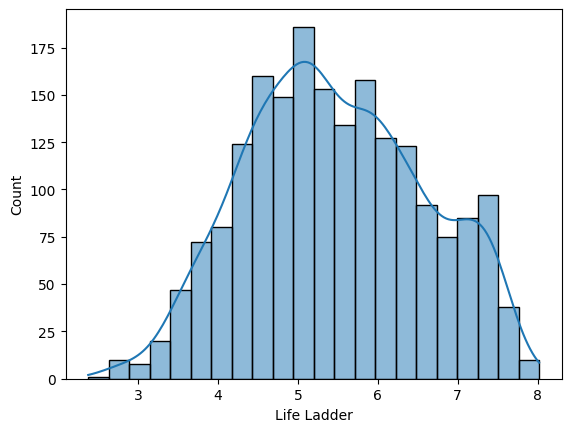

In [4]:
#life ladder
draw_plot_univariate_cont("Life Ladder")

Question B : The distribution of [Life ladder] is slightly negatively skewed, meaning the median would slightly be more than the mean. There are no missing values. One can standardize or normalize the data at the cost of interpretability. We can move ahead with the assumption that the data follows normal distribution though there are two small peaks on the right side of the distribution.

Statistical summary of Log GDP per capita:

 count    1913.000000
mean        9.368453
std         1.154084
min         6.635000
25%         8.464000
50%         9.460000
75%        10.353000
max        11.648000
Name: Log GDP per capita, dtype: float64
---------------------------------
Missing values: 36.000000

Mean: 9.368453

Median: 9.460000 

Skewness: -0.308453

Kurtosis: -0.863622

---------------------------------


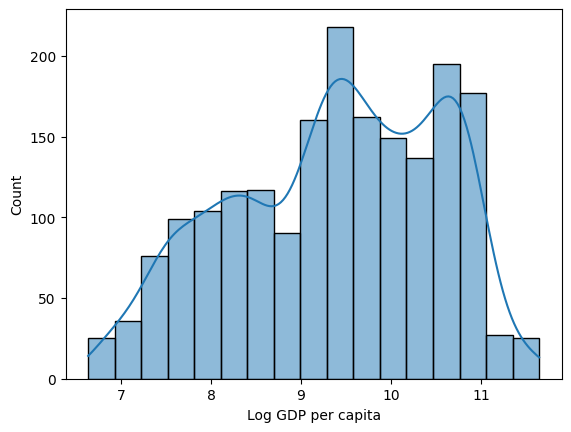

In [5]:
draw_plot_univariate_cont("Log GDP per capita")

Question B: In the feature [ Log GDP per capita], there are 36 missing values, and the distribution does not look normal. Filling of these missing values is required either with mean, median, constant. Furthermore, one can predict these missing values by considering this feature as target variable and the remaining features as independent varible.

Statistical summary of Healthy life expectancy at birth:

 count    1894.000000
mean       63.359374
std         7.510245
min        32.300000
25%        58.685000
50%        65.200000
75%        68.590000
max        77.100000
Name: Healthy life expectancy at birth, dtype: float64
---------------------------------
Missing values: 55.000000

Mean: 63.359374

Median: 65.200000 

Skewness: -0.744426

Kurtosis: -0.053235

---------------------------------


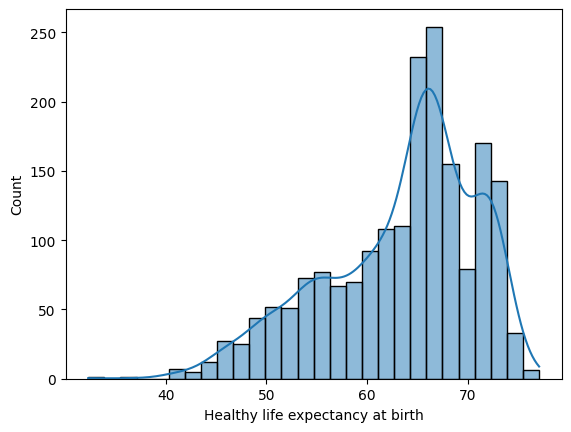

In [6]:
draw_plot_univariate_cont("Healthy life expectancy at birth")

Question B: In the feature [healthy life expectancy at birth] , there are 55 missing values, and the distribution looks irregular. Filling of these missing values is required either with mean, median, constantor any strategy that reduces observer bias in the data.Furthermore, the distribution is negatively skewed with skewness of -0.744.

Statistical summary of Social support:

 count    1936.000000
mean        0.812552
std         0.118482
min         0.290000
25%         0.749750
50%         0.835500
75%         0.905000
max         0.987000
Name: Social support, dtype: float64
---------------------------------
Missing values: 13.000000

Mean: 0.812552

Median: 0.835500 

Skewness: -1.110682

Kurtosis: 1.184451

---------------------------------


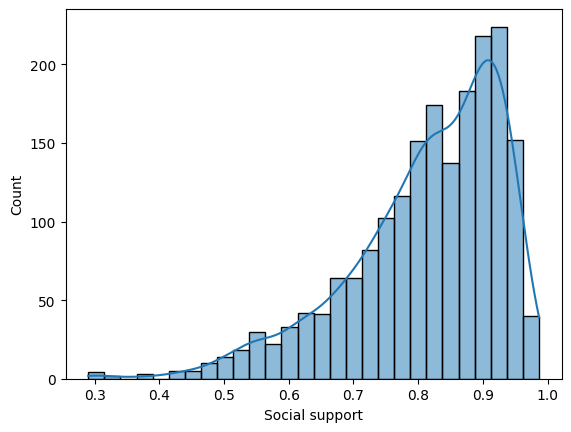

In [7]:
draw_plot_univariate_cont('Social support')

Question B: In the feature [Social support], there are 13 missing values, and the distribution is negatively skewed. Filling of these missing values is required either with mean, median, constant. Furthermore, one can predict these missing values by considering this feature as target variable and the remaining features as independent varible.

Statistical summary of Freedom to make life choices:

 count    1917.000000
mean        0.742558
std         0.142093
min         0.258000
25%         0.647000
50%         0.763000
75%         0.856000
max         0.985000
Name: Freedom to make life choices, dtype: float64
---------------------------------
Missing values: 32.000000

Mean: 0.742558

Median: 0.763000 

Skewness: -0.623019

Kurtosis: -0.126398

---------------------------------


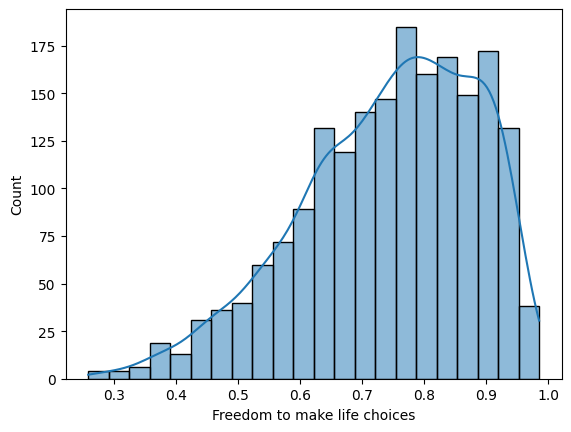

In [8]:
[ 'Healthy life expectancy at birth','Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']
draw_plot_univariate_cont("Freedom to make life choices")

Question B: In the feature [Freedom to make life choices], there are 32 missing values, and the distribution is negatively skewed with skewness of -0.623019. Filling of these missing values is required either with mean, median, constant. Furthermore, one can predict these missing values by considering this feature as target variable and the remaining features as independent varible.

Statistical summary of Generosity:

 count    1860.000000
mean        0.000103
std         0.162215
min        -0.335000
25%        -0.113000
50%        -0.025500
75%         0.091000
max         0.698000
Name: Generosity, dtype: float64
---------------------------------
Missing values: 89.000000

Mean: 0.000103

Median: -0.025500 

Skewness: 0.807140

Kurtosis: 0.840883

---------------------------------


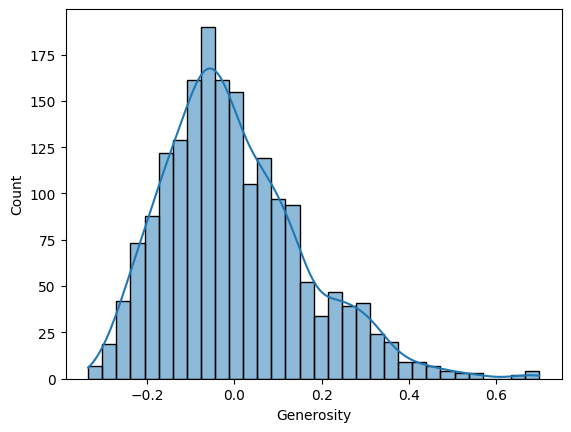

In [9]:
[ 'Healthy life expectancy at birth',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']
draw_plot_univariate_cont("Generosity")

Question B: In the feature [Generosity], there are 89 missing values, and the distribution is positively skewed with skewness of 0.807. One can fill these missing values  with mean, median, constant. Furthermore, one can predict these missing values by considering this feature as target variable and the remaining features as independent varible.

To convert a positvely skewed distribution to normal, one can use square root transformation, the log transformation, and the inverse/reciprocal transformation (in order of increasing severity) etc.

Statistical summary of Perceptions of corruption:

 count    1839.000000
mean        0.747125
std         0.186789
min         0.035000
25%         0.690000
50%         0.802000
75%         0.872000
max         0.983000
Name: Perceptions of corruption, dtype: float64
---------------------------------
Missing values: 110.000000

Mean: 0.747125

Median: 0.802000 

Skewness: -1.496045

Kurtosis: 1.838901

---------------------------------


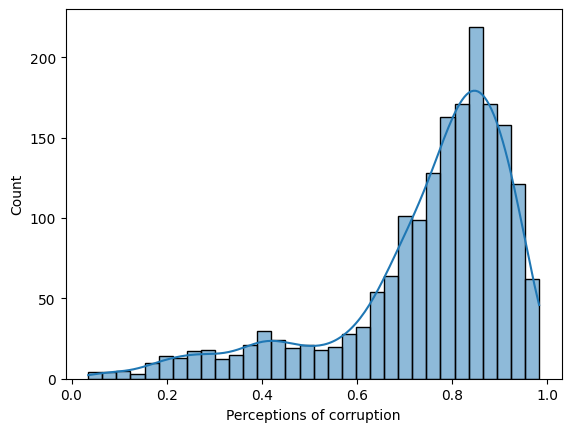

In [10]:
[ 'Healthy life expectancy at birth', 'Positive affect', 'Negative affect']
draw_plot_univariate_cont("Perceptions of corruption")

Question B: In the feature [Generosity], there are 110 missing values, and the distribution is negatively skewed with skewness of -1.49. One can fill these missing values  with mean, median, constant. Furthermore, one can predict these missing values by considering this feature as target variable and the remaining features as independent varible.

In [11]:
[ 'Healthy life expectancy at birth', 'Negative affect']

['Healthy life expectancy at birth', 'Negative affect']

Statistical summary of Positive affect:

 count    1927.000000
mean        0.710003
std         0.107100
min         0.322000
25%         0.625500
50%         0.722000
75%         0.799000
max         0.944000
Name: Positive affect, dtype: float64
---------------------------------
Missing values: 22.000000

Mean: 0.710003

Median: 0.722000 

Skewness: -0.364197

Kurtosis: -0.583055

---------------------------------


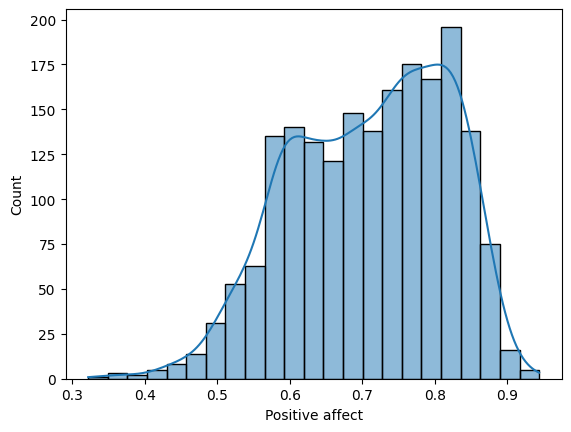

In [12]:
draw_plot_univariate_cont("Positive affect")

Question B: In the feature [Positve effect], there are 22 missing values, and the distribution is negatively skewed with skewness of -0.36. The majority of data lies within 0.6t- 0.85. One can fill these missing values  with mean, median, constant or other strategies that minimizes the observer bias in the data.

Statistical summary of Negative affect:

 count    1933.000000
mean        0.268544
std         0.085168
min         0.083000
25%         0.206000
50%         0.258000
75%         0.320000
max         0.705000
Name: Negative affect, dtype: float64
---------------------------------
Missing values: 16.000000

Mean: 0.268544

Median: 0.258000 

Skewness: 0.737166

Kurtosis: 0.868069

---------------------------------


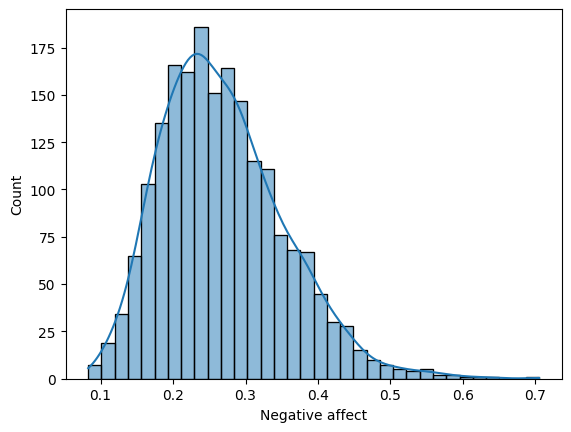

In [13]:
draw_plot_univariate_cont("Negative affect")

Question B: In the feature [Negative affect], there are 16 missing values, and the distribution is positively  skewed with skewness of 0.73. One can fill these missing values  with mean, median, constant or other strategies that minimizes the observer bias in the data.

In [14]:
#plot for categorical columns

def draw_plot_univariate_cat(column,fig_x,fig_y):
  print(f"Statistical summary of {column}:\n\n",df[column].describe(include='object'))
  print("---------------------------------")
  print("Missing values: %f\n" % df[column].isnull().sum())
  print("---------------------------------")
  print("Count")
  print("---------------------------------")
  print(df[column].value_counts())
  print("---------------------------------")
  plt.figure(figsize=(fig_x,fig_y))
  ax = sns.countplot(x=column, data=df)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.show()

Statistical summary of Country name:

 count         1949
unique         166
top       Zimbabwe
freq            15
Name: Country name, dtype: object
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
Zimbabwe        15
South Africa    15
Tanzania        15
Denmark         15
Tajikistan      15
                ..
Maldives         1
Suriname         1
Cuba             1
Oman             1
Guyana           1
Name: Country name, Length: 166, dtype: int64
---------------------------------


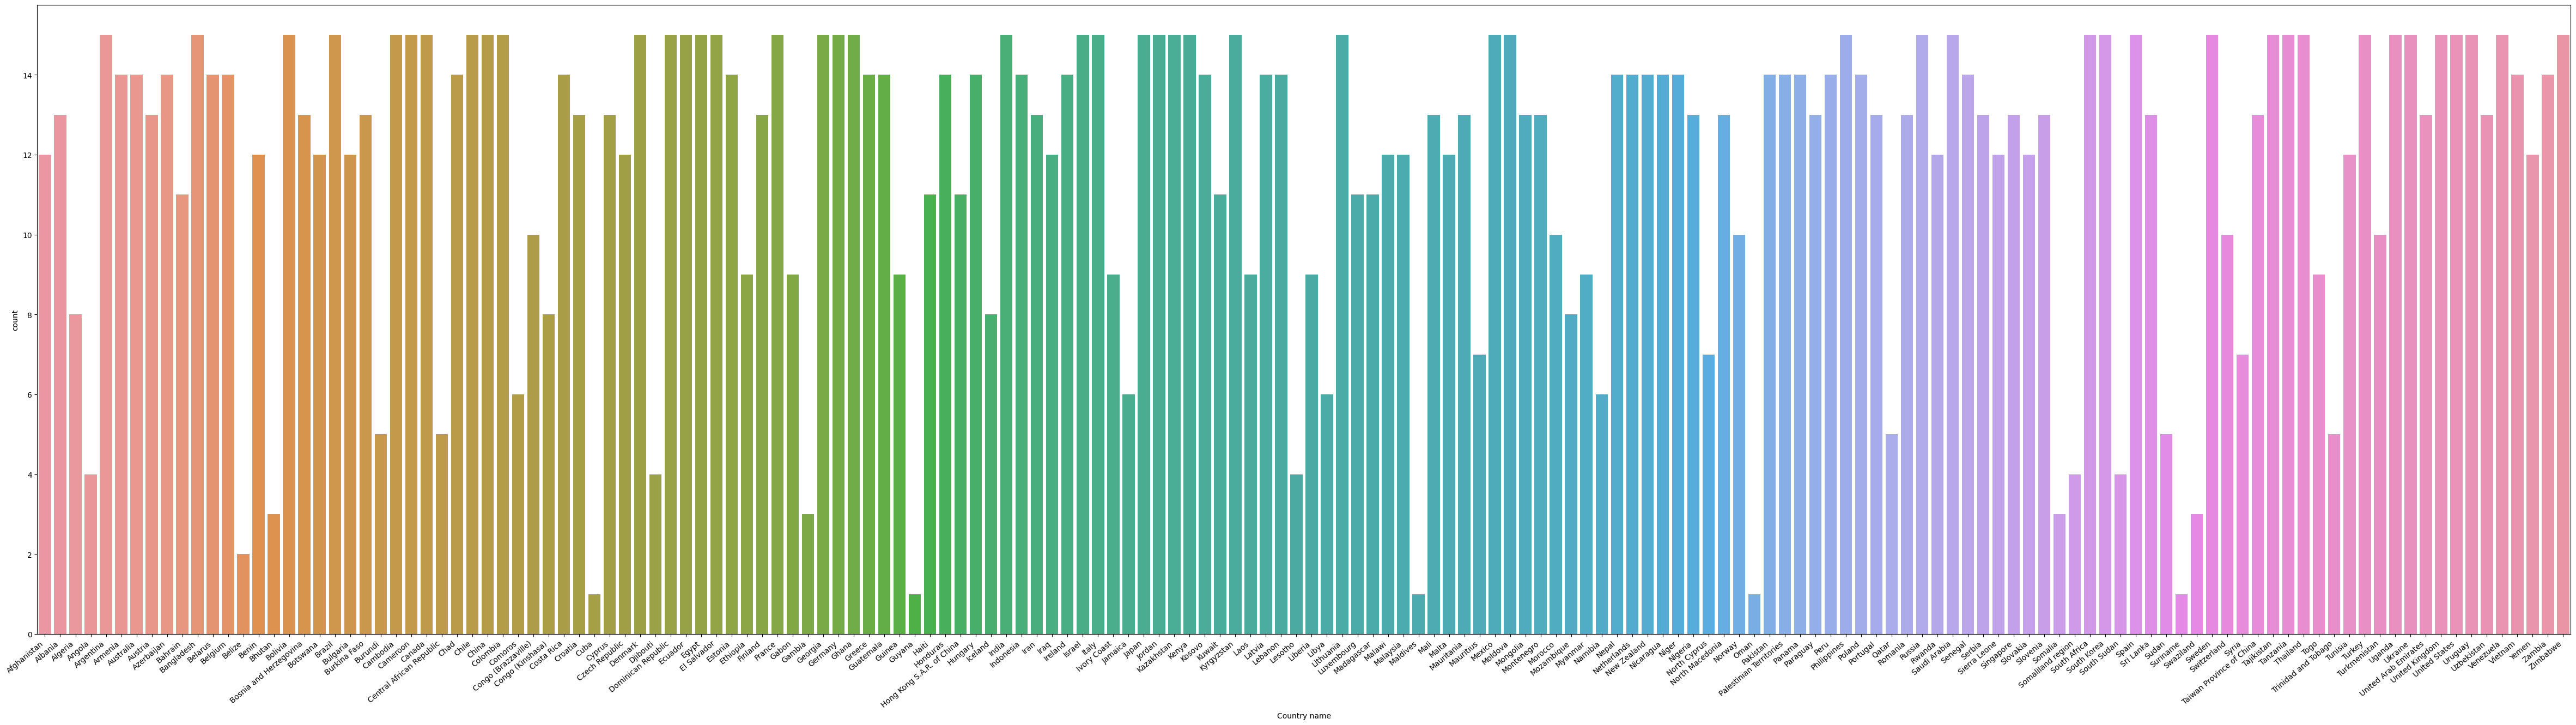

In [15]:
draw_plot_univariate_cat("Country name",60,15)

Question B : In the ["Country name"] feature there are no missing values. There are 166 unique values. These categorical values should be converted into numerical values. I would preferrably use one hot encoding as label encoding may imply ranking between categories. But we have to make sure we dont fall into the "dummy variable trap" and "curse of dimensionality".

Statistical summary of year:

 count    1949.000000
mean     2013.216008
std         4.166828
min      2005.000000
25%      2010.000000
50%      2013.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
2017    147
2011    146
2014    145
2019    144
2015    143
2012    142
2016    142
2018    142
2013    137
2010    124
2009    114
2008    110
2007    102
2020     95
2006     89
2005     27
Name: year, dtype: int64
---------------------------------


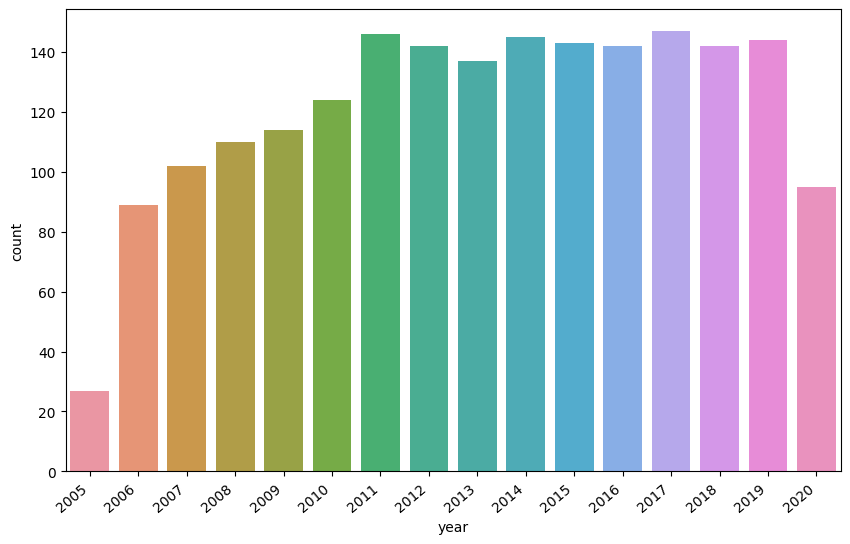

The number of unique values 

 16


In [16]:
draw_plot_univariate_cat("year",10,6)
print("The number of unique values \n\n",df["year"].nunique())

Question B : In the ["Year"] feature there are no missing values. There are 16 unique values. As mentioned in the question, we will be dropping this column, hence no special treatment required.

----------------------------------------------------------------------------------------------------------

Question C: Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. [5 points]

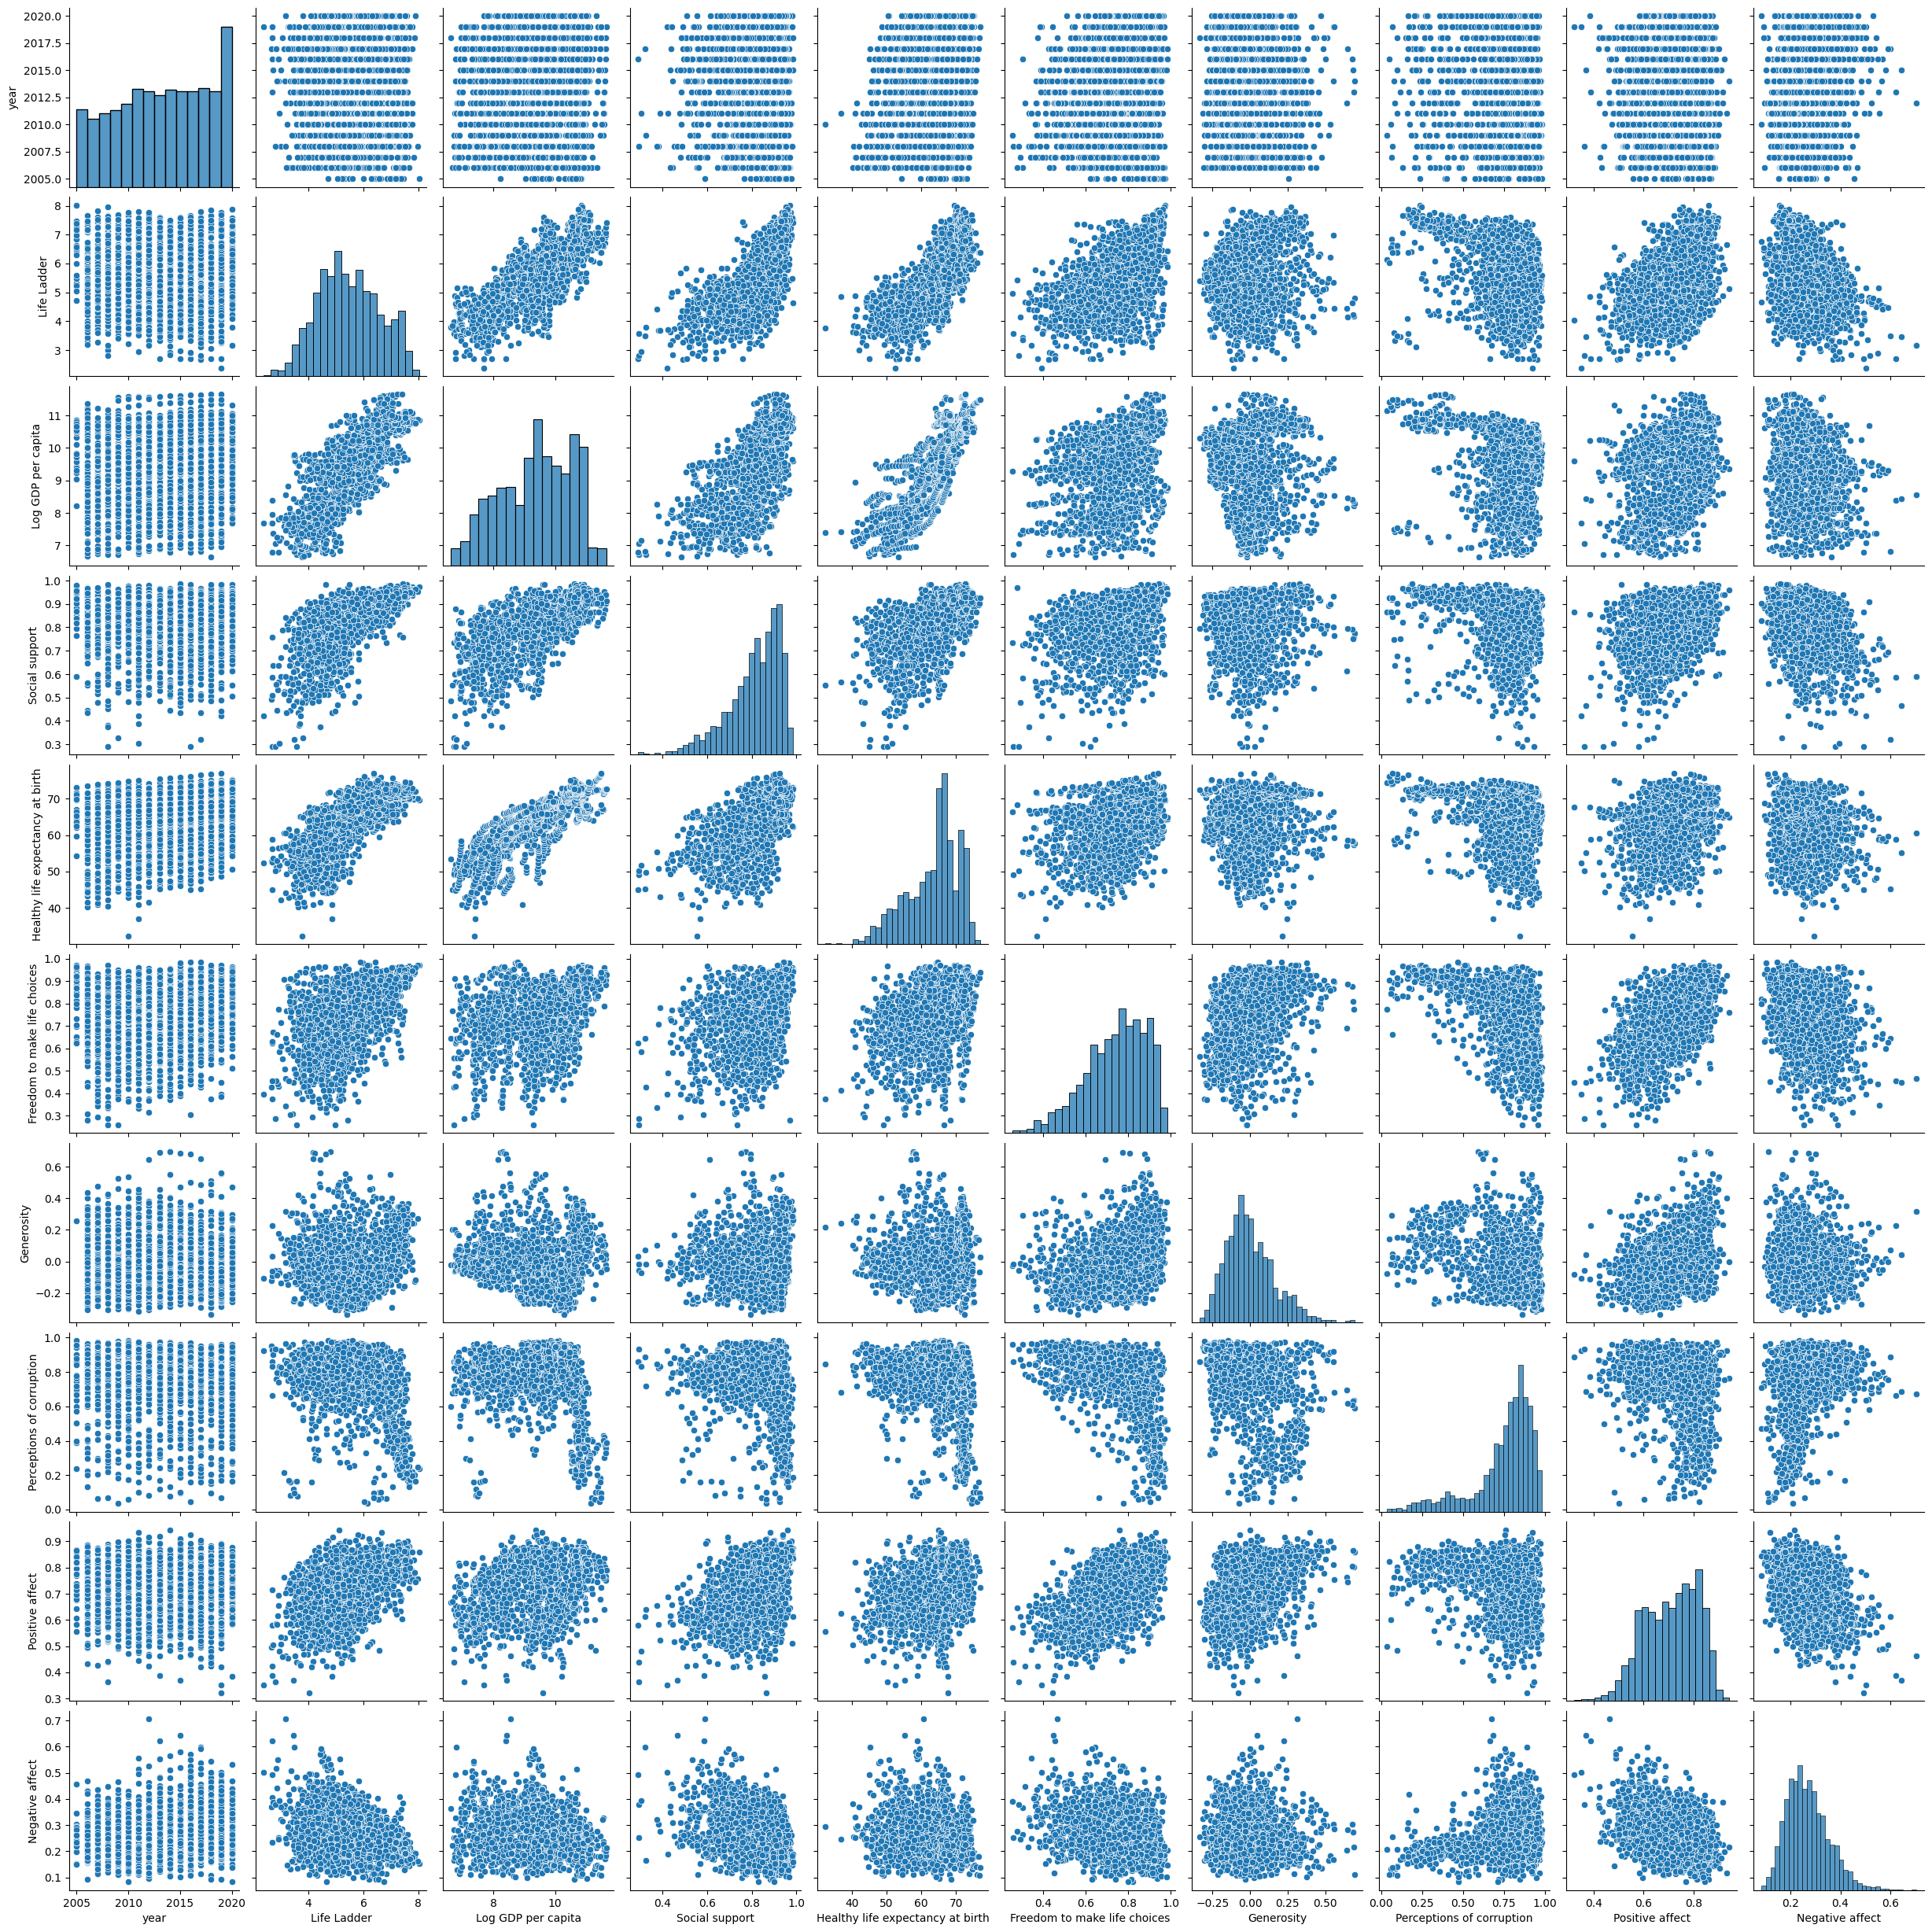

In [17]:
#scatter plot between features
sns.pairplot(data=df)

<Axes: >

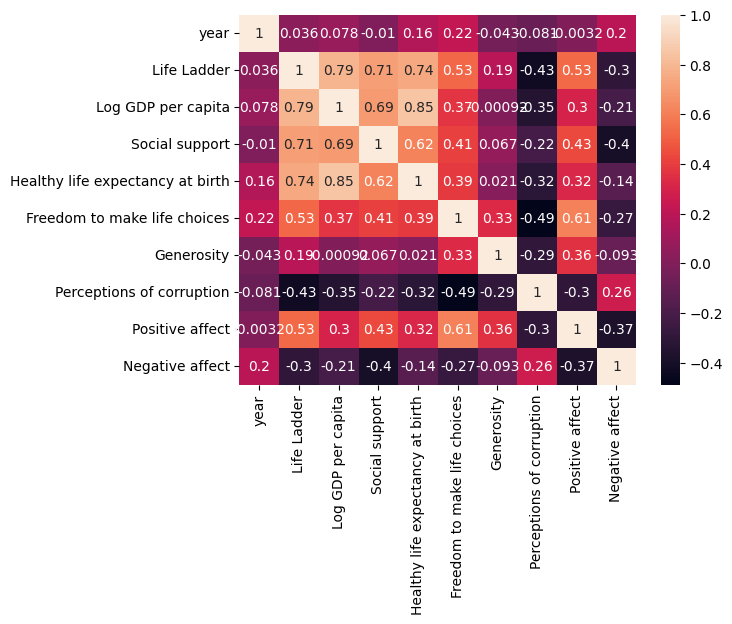

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [19]:
corr_matrix = df.corr(method="pearson",numeric_only = True)
corr_matrix["Life Ladder"].sort_values(ascending = False)

Life Ladder                         1.000000
Log GDP per capita                  0.790166
Healthy life expectancy at birth    0.744506
Social support                      0.707806
Positive affect                     0.532273
Freedom to make life choices        0.528063
Generosity                          0.190632
year                                0.035515
Negative affect                    -0.297488
Perceptions of corruption          -0.427245
Name: Life Ladder, dtype: float64

Question C:
Life Ladder vs Rest:
One can clearly see that Life ladder has positive correlation between gdp per capita, Healthy life expectancy at birth and Social support, at the same time negative correlated  Negative affect and Perceptions of corruption. It intuitively makes sense because one can expect the population to be happy where the per capita income, health and support is present, at the same time look down on corruption. Additionally, a happy country also has less angry, troubled or sad people in it. The feature "year" almost has zero correlation meaning, year does not define how happy people are, with rare exceptions.

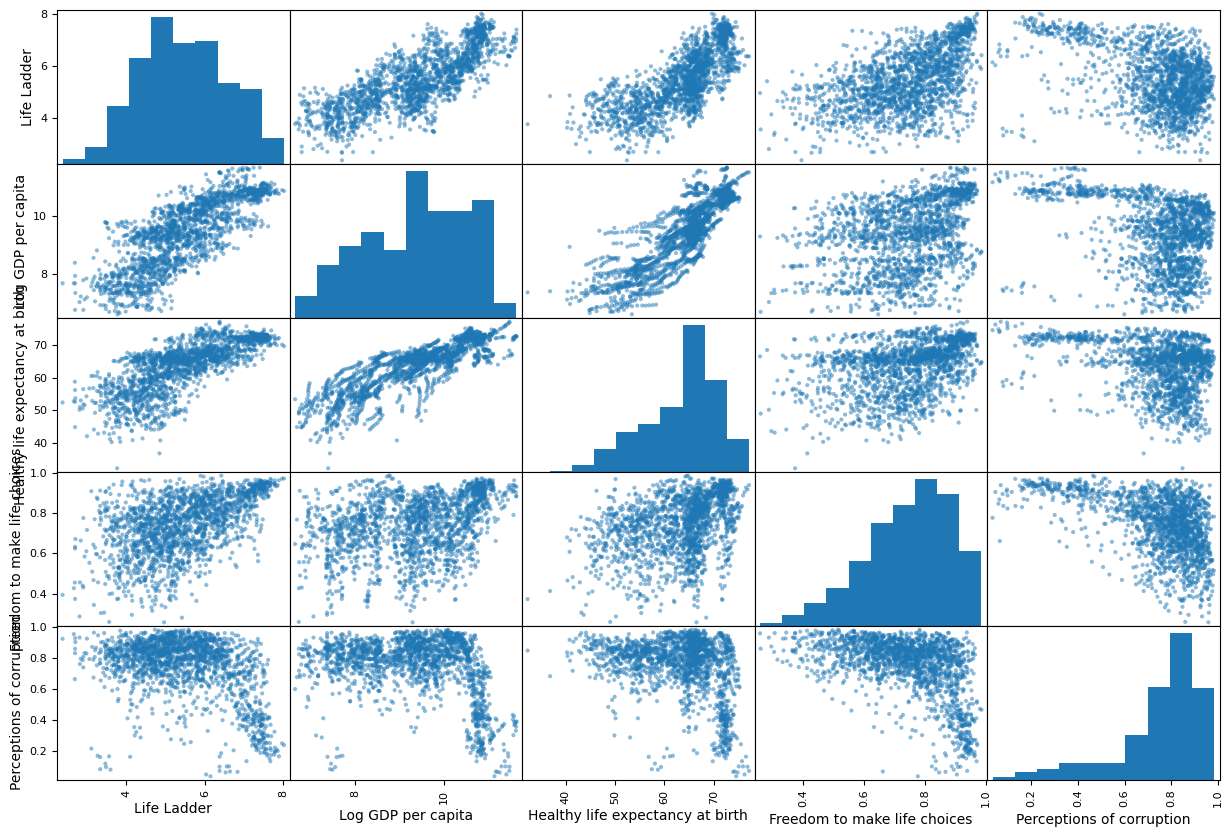

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["Life Ladder", "Log GDP per capita", "Healthy life expectancy at birth",
"Freedom to make life choices","Perceptions of corruption"]
scatter_matrix(df[attributes], figsize=(15, 10))
plt.show()

looking at the graphs, the most promising attribute to predict the happiness of population seems to be Log GDP per capita. Hence, lets take closer look at it.

Observation : There is an upward trend, and the correlation is strong. The top right corner is densely populated with minimal outliers.

<Axes: xlabel='Log GDP per capita', ylabel='Life Ladder'>

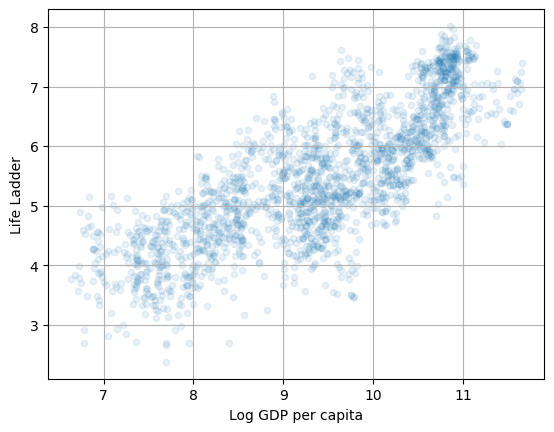

In [21]:
df.plot(kind="scatter", x="Log GDP per capita", y="Life Ladder",alpha=0.1, grid=True)

In [22]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

Freedom to make life choices vs [Positive affect and Negative affect]:

Observation : it is clear that there is upward trend in positive affect as the freedom to make life choices increase but opposite when that freedom is absent.

<Axes: xlabel='Freedom to make life choices', ylabel='Negative affect'>

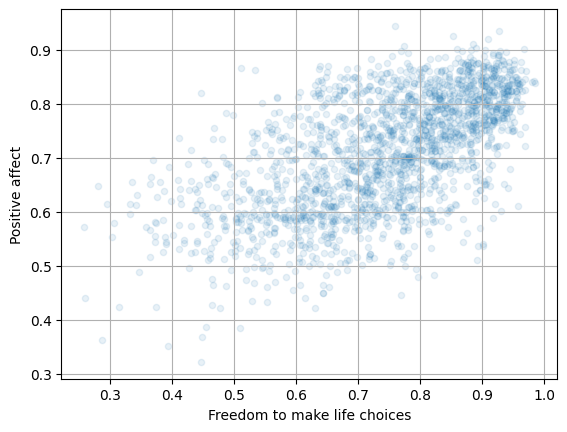

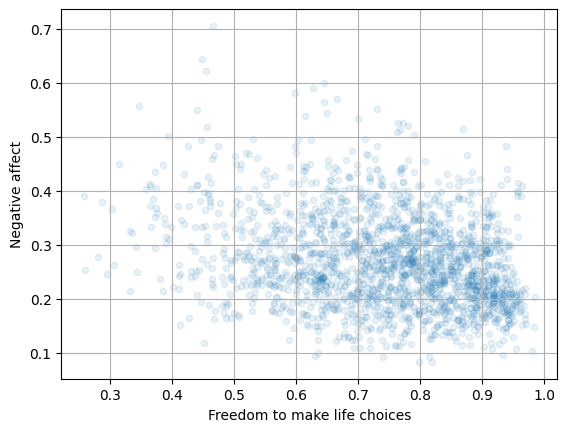

In [23]:
#lets explore other attributes
df.plot(kind="scatter", x="Freedom to make life choices", y='Positive affect',alpha=0.1, grid=True)
df.plot(kind="scatter", x="Freedom to make life choices", y='Negative affect',alpha=0.1, grid=True)

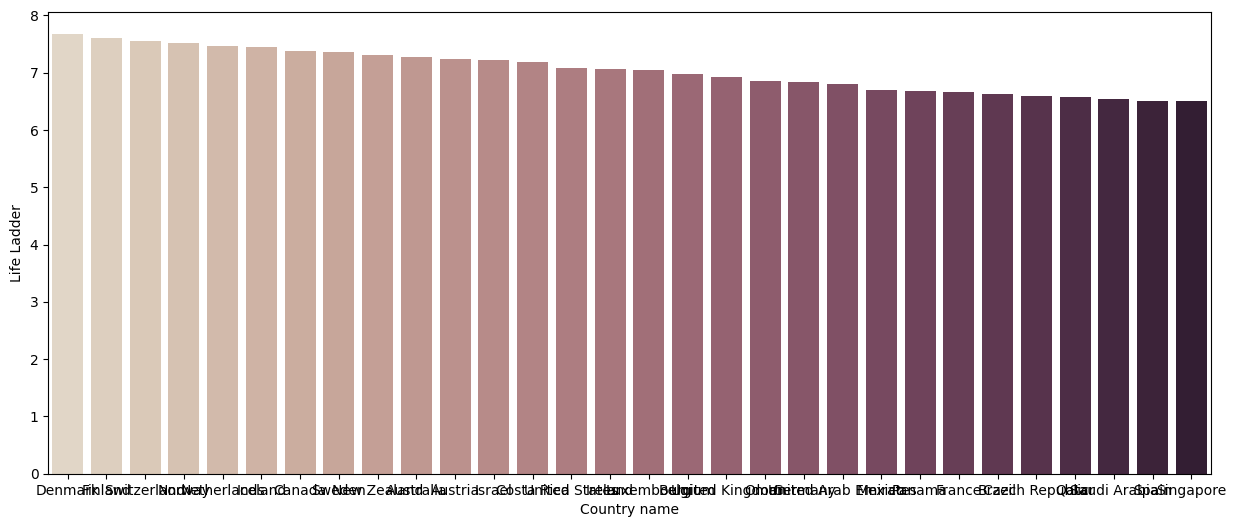

In [24]:
#lets take a look at 30 countries that are the most happy
country = df.groupby(['Country name']).mean().sort_values(by=["Life Ladder"],ascending = False).reset_index()[["Country name","Life Ladder"]]
plt.figure(figsize=(15,6))
ax=sns.barplot(data=country.iloc[:30,:], x="Country name",y ="Life Ladder", palette="ch:.25")

In [25]:
country.head(3)

Country name  Life Ladder
0      Denmark     7.680400
1      Finland     7.597154
2  Switzerland     7.548300

Observation : It looks like Denmark, Finaland and Switzerland are the three amount the happiest countries in the world with Life ladder rangind from 7.55 - 7.68

----------------------------------------------------------------------------------------------------



###### Before we split the data, lets clean and transform the data to minimize any kind of noise or irregularities.

In [26]:
#Let's calculate the percentage of missing values in each column.
perc_missing = pd.DataFrame((df.isna().sum()/len(df)) * 100,columns = ["Perecentage Missing"])
perc_missing
#sns.heatmap(df.isnull(), cbar=False)

Perecentage Missing
Country name                                 0.000000
year                                         0.000000
Life Ladder                                  0.000000
Log GDP per capita                           1.847101
Social support                               0.667009
Healthy life expectancy at birth             2.821960
Freedom to make life choices                 1.641868
Generosity                                   4.566444
Perceptions of corruption                    5.643920
Positive affect                              1.128784
Negative affect                              0.820934

In [27]:
#fill all missing values with median.

# Because most of our numerocal data data is either positively skewed or negatively skewed, we will use "median" to fill all NAN values.
#we do not have any missing values in our categorical colum

for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].median())

In [28]:
#lets check
df.isna().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [29]:
#drop country as mentioned in the question
df.drop(columns = ["year"],inplace =True)
df.columns

Index(['Country name', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

### Handling Text and Categorical Attributes

In [30]:
df["Country name"].nunique()

166

The only categorical data that we have is "country".
Because country does not have any rankings or order, label encoding shouldnt be done. But at the same time because we have 166 counties, creating an individual column for each country will increase the total number of columns.

Method : lets label encode it and check if the column is adding any variance to the target variable.

In [31]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Country name']= label_encoder.fit_transform(df['Country name'])

In [32]:
#split the data into independent and target variable
X = df.drop(columns = ["Life Ladder"])
y = df["Life Ladder"]

In [33]:
#converting df into data matrix
X = np.asarray(X) # Data Matrix containing all features excluding the target
y = np.asarray(y) # 1D target array
print("Data Matrix (X) Shape: ", X.shape)
print("Label Array (y) Shape: ", y.shape)
print("\nData Matrix (X) Type: ", X.dtype)
print("Label Array (y) Type: ", y.dtype)

Data Matrix (X) Shape:  (1949, 9)
Label Array (y) Shape:  (1949,)

Data Matrix (X) Type:  float64
Label Array (y) Type:  float64


## D : Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

In [34]:
#create an additional column with bins
df["life_cat"] = pd.cut(df["Life Ladder"],bins=[0., 1., 2.,3.,4.,5.,6.,7., np.inf],labels=[1, 2, 3, 4, 5,6,7,8])
#based on this column, split the data so that you have equal portions in your training

In [35]:
from sklearn.model_selection import StratifiedKFold

In [36]:
#reference https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedGroupKFold.html
train,test = train_test_split(df, test_size=0.2, stratify=df["life_cat"], random_state=42)    # divided properly
#drop df["life_cat"]
train.drop(columns = ["life_cat"],inplace=True)
test.drop(columns = ["life_cat"],inplace=True)

The provided code snippet splits the dataset into training and testing sets while ensuring that the stratification of a specific column ('life_cat') is maintained. Here's a step-by-step explanation:

1. **Binning**: A new column 'life_cat' is created by binning values from the 'Life Ladder' column into eight categories based on predefined bins. This categorization groups similar 'Life Ladder' values into the same category, making it easier to stratify the data.

2. **Stratification**: The `train_test_split` function from scikit-learn is used to split the data into training and testing sets. The `stratify` parameter is set to 'life_cat,' ensuring that the proportion of each 'life_cat' category in the original dataset is approximately preserved in both the training and testing sets. This helps maintain representativeness.

3. **Randomness**: The split is done randomly, and the 'random_state' parameter is set to 42 to ensure reproducibility. This means that the same random split will occur each time the code is executed, making it consistent for analysis and testing.

By using stratified sampling and a fixed random seed ('random_state'), the code aims to create a representative testing portion (20% of the data) that mirrors the distribution of 'life_cat' categories in the entire dataset. This helps ensure that the testing set accurately reflects the diversity of 'Life Ladder' values present in the original data, making the evaluation of models more reliable.

### Question E : Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration. [10 points]

**Question-E Part 1- Normal Form**

In [38]:
from sklearn.model_selection import KFold, cross_validate
X_train= train.drop(columns = ["Life Ladder"])
y_train = train["Life Ladder"]
X_test = test.drop(columns = ["Life Ladder"])
y_test = test["Life Ladder"]
#converting df into data matrix
X_train,X_test = np.asarray(X_train) ,np.asarray(X_test)# Data Matrix containing all features excluding the target
y_train,y_test= np.asarray(y_train), np.asarray(y_test)# 1D target array
print("Data Matrix (X) Shape: ", X_train.shape)
print("Label Array (y) Shape: ", y_train.shape)
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)
n_splits = 4
kf = KFold(n_splits=n_splits, shuffle=True)
lin_model = LinearRegression()
scoring=('r2', 'neg_mean_squared_error')
cv_results = cross_validate(lin_model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)
cv_results

Data Matrix (X) Shape:  (1559, 9)
Label Array (y) Shape:  (1559,)


{'fit_time': array([0.02942872, 0.00428247, 0.00363398, 0.00344753]),
 'score_time': array([0.00081372, 0.00082517, 0.00064349, 0.00061202]),
 'test_r2': array([0.7491951 , 0.76311491, 0.7591343 , 0.78542619]),
 'train_r2': array([0.77556864, 0.77077348, 0.77162672, 0.76303218]),
 'test_neg_mean_squared_error': array([-0.31948773, -0.28925286, -0.28909431, -0.27368862]),
 'train_neg_mean_squared_error': array([-0.27690347, -0.28660675, -0.28732846, -0.2921074 ])}

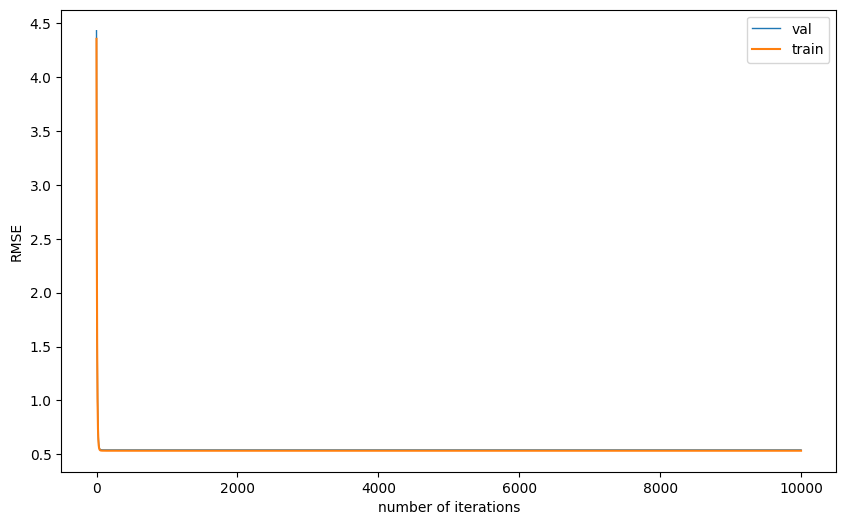


----------------------------- Model Evaluation -----------------------------
Training: Mean squared error: 0.29


In [44]:
# SGD with varying epochs
#split the train into train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, shuffle = True,test_size=0.2, random_state=42)
lin_reg_sgd = SGDRegressor(eta0=0.001, random_state=42)
n_epochs =10000
mse_train_list, mse_validation_list = [], []
for i in range(n_epochs):
  lin_reg_sgd.partial_fit(X_train, y_train)
  y_train_predicted_sgd = lin_reg_sgd.predict(X_train)
  y_valid_predicted_sgd = lin_reg_sgd.predict(X_valid)
  train_score = np.sqrt(mean_squared_error(y_train,y_train_predicted_sgd))
  valid_score = np.sqrt(mean_squared_error(y_valid,y_valid_predicted_sgd))
  mse_train_list.append(train_score)
  mse_validation_list.append(valid_score)

# Plot RMSE values for varying
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(n_epochs)], mse_validation_list,linewidth=1.0, label="Validation RMSE")
plt.plot([i for i in range(n_epochs)], mse_train_list,label="Train RMSE")
plt.legend(['val','train'], loc='upper right')
plt.xlabel("number of iterations")
plt.ylabel("RMSE")
plt.show()
print("\n----------------------------- Model Evaluation -----------------------------")
# Make prediction
y_train_predicted_sgd = lin_reg_sgd.predict(X_train)
print("Training: Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_sgd))

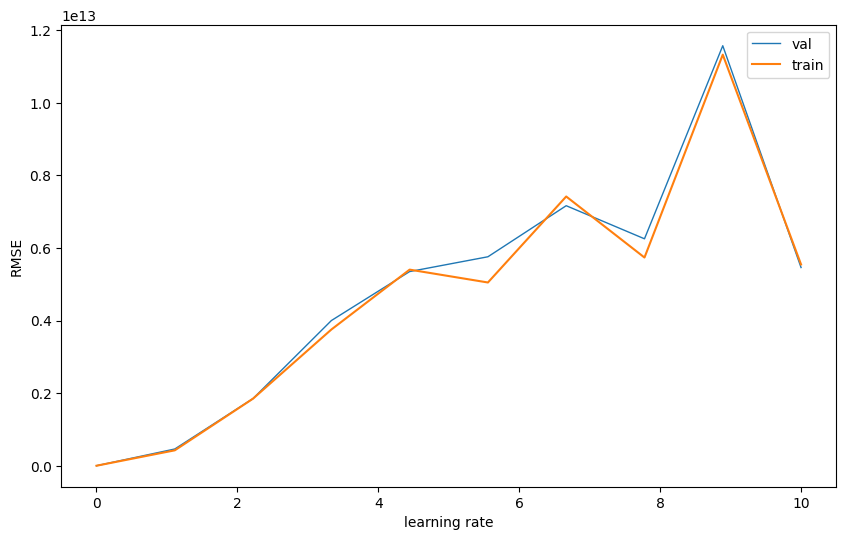

Intercept: 
 [-1.64626586e+12]
Coefficients: 
 [-1.36522783e+12  3.95472542e+12  5.90924722e+11 -1.91995553e+12
  2.57178363e+12 -1.52250259e+12 -2.27965443e+12 -2.56357508e+12
  1.73745121e+12]

----------------------------- Model Evaluation -----------------------------
Training: Mean squared error: 30747957833579355023867904.00
Test: Mean squared error: 30131044182151102516428800.00


In [46]:
# SGD for various learning rate
#split the train into train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, shuffle = True,test_size=0.2, random_state=42)
mse_train_list, mse_validation_list = [], []
learning_rate = np.linspace(0.001,10,10)
for i in learning_rate:
  lin_reg_sgd = SGDRegressor(eta0=i, random_state=42)
  lin_reg_sgd.partial_fit(X_train, y_train)
  y_train_predicted_sgd = lin_reg_sgd.predict(X_train)
  y_valid_predicted_sgd = lin_reg_sgd.predict(X_valid)
  train_score = mean_squared_error(y_train,y_train_predicted_sgd,squared=False)
  valid_score = mean_squared_error(y_valid,y_valid_predicted_sgd,squared=False)
  mse_train_list.append(train_score)
  mse_validation_list.append(valid_score)

# Plot RMSE values for varying
plt.figure(figsize=(10, 6))
plt.plot([i for i in learning_rate], mse_validation_list,linewidth=1.0, label="Validation RMSE")
plt.plot([i for i in learning_rate], mse_train_list,label="Train RMSE")
plt.legend(['val','train'], loc='upper right')
plt.xlabel("learning rate")
plt.ylabel("RMSE")
plt.show()

# The intercept
print("Intercept: \n", lin_reg_sgd.intercept_)
# The coefficients
print("Coefficients: \n", lin_reg_sgd.coef_)
print("\n----------------------------- Model Evaluation -----------------------------")
# Make prediction
y_train_predicted_sgd = lin_reg_sgd.predict(X_train)
y_test_predicted_sgd = lin_reg_sgd.predict(X_test)
print("Training: Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_sgd))
print("Test: Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_predicted_sgd))

**Learning Curve Cross Over:**

1. **Early Training Phase:** At the beginning of training, the model typically performs better on the training dataset than on the validation dataset. This is expected because the model is learning from the training data and can fit it relatively well.

2. **Cross Over Point:** As training progresses, there may be a point where the model's performance on the validation dataset starts improving, while its performance on the training dataset might stagnate or degrade slightly. This is the crossover point.

3. **Later Training Phase:** Beyond the crossover point, the model's performance on the validation dataset is expected to be consistently better or at least not worse than its performance on the training dataset.


**Question-E Part 2- Regularization -Ridge**

Text(0.5, 1.0, 'Ridge coefficients as a function of alpha')

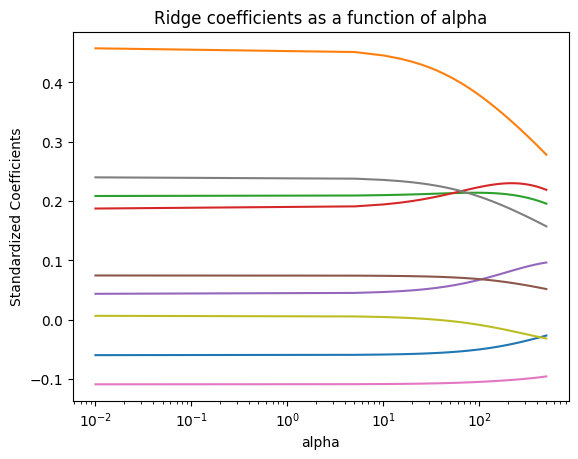

In [66]:
#Ridge regression
ridge_alphas = np.linspace(0.01,500,100)   #penalty parameter
ridge = Ridge(max_iter=10000)
coefs = []
for a in ridge_alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of alpha')

**Question-E Part 2- Regularization -Lasso**


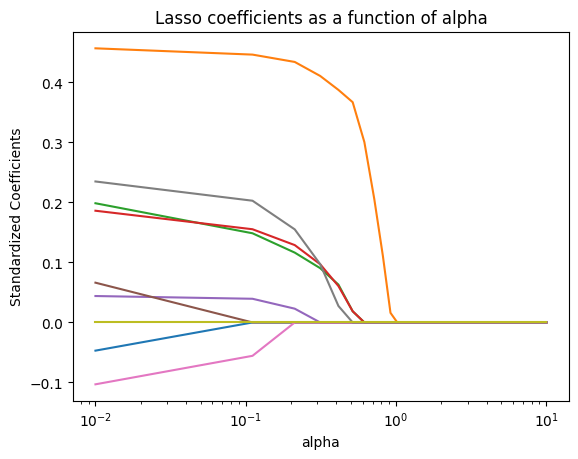

In [69]:
# lasso regression
alphas = np.linspace(0.01,10,100)
lasso = Lasso(max_iter=10000)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

**Question-E Part 2- Regularization -Elastic Net**


In [78]:
#elastic net
param_grid = {'alpha': [0.1, 0.01,0.001], 'l1_ratio': [1, 0.5]}
enet = ElasticNet()
enet_cv = GridSearchCV(enet, param_grid, scoring='neg_mean_squared_error', cv=4, verbose=-1)
enet_cv.fit(X_train, y_train)
params_optimal_enet = enet_cv.best_params_
print("Best Score (negative mean squared error): %f" % np.sqrt(-enet_cv.best_score_))
print("Optimal Hyperparameter Values: ", params_optimal_enet)
print("\n")

Best Score (negative mean squared error): 0.514294
Optimal Hyperparameter Values:  {'alpha': 0.01, 'l1_ratio': 0.5}




**Question-E Part 3- Linear -Hyperparameter tuning**

In [59]:
# Create Elestic Net linear regression object using the optimal hyperparameter values
lin_reg_enet = ElasticNet(**params_optimal_enet)
# Train the model
lin_reg_enet.fit(X_train, y_train)
print("Number of Iterations: \n", lin_reg_enet.n_iter_)
print("\n----------------------------- Model Evaluation -----------------------------")
# Make prediction
y_train_predicted_enet = lin_reg_enet.predict(X_train)
print("Training: root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_train, y_train_predicted_enet)))
# Scoring Parameter for Regression:
scores = -(cross_val_score(lin_reg_enet, X_train, y_train, scoring='neg_mean_squared_error', cv=10))
print(np.sqrt(scores))

print("\nTraining: Root Mean Squared Error: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# Make prediction using the test data
y_test_predicted = lin_reg_enet.predict(X_test)
print("Test: Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_test_predicted)))

Number of Iterations: 
 19

----------------------------- Model Evaluation -----------------------------
Training: root Mean squared error: 0.52
[0.6020735  0.47633719 0.5645261  0.50606436 0.48041297 0.49737635
 0.54883132 0.5436536  0.51800281 0.48881101]

Training: Root Mean Squared Error: 0.27 (+/- 0.08)
Test: Root Mean squared error: 0.58


In [61]:
#prediction for Linear regression with CV
lin_reg_enet.fit(X_train,y_train)
y_pred = lin_reg_enet.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [74]:
#SGD
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, shuffle = True,test_size=0.2, random_state=42)
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)
cv_score = cross_val_score(sgd_reg, X_train, y_train, cv = 4)
print("CV mean score: ", np.sqrt(cv_score.mean()))

CV mean score:  0.8841414416105251


In [75]:
y_pred = sgd_reg.predict(X_test)
sgd_reg = np.sqrt(mean_squared_error(y_test,y_pred))

** Q: F Part-1 Poly Normal form **

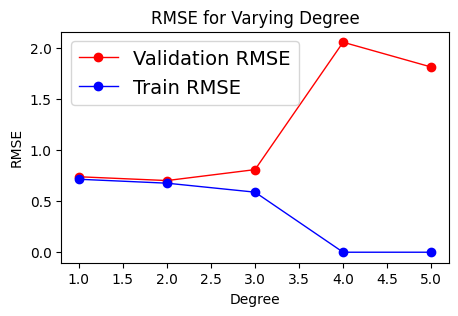

In [47]:
#Polynomial linear regression Normal
# Partition the training data into train and validation subsets for this experiment
X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Two lists to store train and validation MSE values for various models of varying complexity
mse_train_list, mse_validation_list = [], []
degreeList = [1,2,3,4,5]
for degree in degreeList:
    # Create a pipeline object: first add polynomials, then standardize, finally create Linear Regression model
    model = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())
    # Train the model
    model.fit(X_train_new, y_train_new)
    # Make prediction
    y_train_predicted = model.predict(X_train_new)
    y_validation_predicted = model.predict(X_validation)
    # Compute MSE and add to the list
    mse_train_list.append(np.sqrt(mean_squared_error(y_train_new, y_train_predicted)))
    mse_validation_list.append(np.sqrt(mean_squared_error(y_validation, y_validation_predicted)))

# Plot RMSE values for varying polynomial degree
plt.figure(figsize=(5, 3))
plt.plot(degreeList, np.sqrt(mse_validation_list), "ro-", alpha=1.0, linewidth=1.0, label="Validation RMSE")
plt.plot(degreeList, np.sqrt(mse_train_list), "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")
plt.legend(loc="best", fontsize=14)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE for Varying Degree")
plt.show()

In [48]:
#prediction for polynomial regression
y_pred = model.predict(X_test)
poly_lin_reg = np.sqrt(mean_squared_error(y_test,y_pred))

**Question-F Part 1- Poly -SGD**

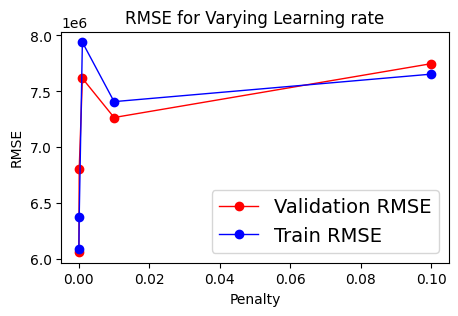

In [55]:
#Polynomial linear regression with SGD
learning_rate = [0.00001,0.0001,0.001,0.01,0.1 ]
coefs = []
# Partition the training data into train and validation subsets for this experiment
X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Two lists to store train and validation MSE values for various models of varying complexity
mse_train_list, mse_validation_list = [], []
for a in learning_rate:
    # Create a pipeline object: first add polynomials, then standardize, finally create Linear Regression model
    model = make_pipeline(PolynomialFeatures(2, include_bias=False),SGDRegressor(eta0=i))
    # Train the model
    model.fit(X_train_new, y_train_new)
    # Make prediction
    y_train_predicted = model.predict(X_train_new)
    y_validation_predicted = model.predict(X_validation)
    # Compute MSE and add to the list
    mse_train_list.append(np.sqrt(mean_squared_error(y_train_new, y_train_predicted)))
    mse_validation_list.append(np.sqrt(mean_squared_error(y_validation, y_validation_predicted)))
# Plot RMSE values for varying polynomial degree
plt.figure(figsize=(5, 3))
plt.plot(learning_rate, np.sqrt(mse_validation_list), "ro-", alpha=1.0, linewidth=1.0, label="Validation RMSE")
plt.plot(learning_rate, np.sqrt(mse_train_list), "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")
plt.legend(loc="best", fontsize=14)
plt.xlabel("Penalty")
plt.ylabel("RMSE")
plt.title("RMSE for Varying Learning rate")
plt.show()

In [56]:
y_pred = model.predict(X_test)
poly_lin_sgd = np.sqrt(mean_squared_error(y_test,y_pred))

**Question-F Part 2- Poly -Ridge**

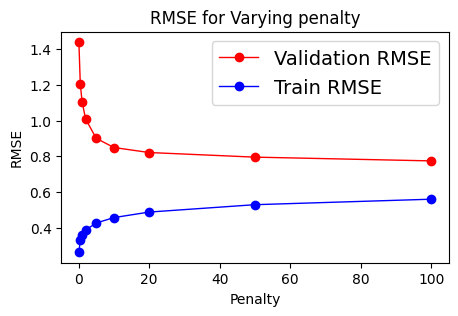

In [49]:
#Polynomial linear regression with ridge regularization
ridge = [0.1,0.5, 1,2, 5, 10,20, 50,100]
coefs = []
# Partition the training data into train and validation subsets for this experiment
X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Two lists to store train and validation MSE values for various models of varying complexity
mse_train_list, mse_validation_list = [], []
for a in ridge:
    # Create a pipeline object: first add polynomials, then standardize, finally create Linear Regression model
    model = make_pipeline(PolynomialFeatures(4, include_bias=False), Ridge(alpha = a,max_iter=10000))
    # Train the model
    model.fit(X_train_new, y_train_new)
    # Make prediction
    y_train_predicted = model.predict(X_train_new)
    y_validation_predicted = model.predict(X_validation)
    # Compute MSE and add to the list
    mse_train_list.append(np.sqrt(mean_squared_error(y_train_new, y_train_predicted)))
    mse_validation_list.append(np.sqrt(mean_squared_error(y_validation, y_validation_predicted)))

# Plot RMSE values for varying polynomial degree
plt.figure(figsize=(5, 3))
plt.plot(ridge, np.sqrt(mse_validation_list), "ro-", alpha=1.0, linewidth=1.0, label="Validation RMSE")
plt.plot(ridge, np.sqrt(mse_train_list), "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")
plt.legend(loc="best", fontsize=14)
plt.xlabel("Penalty")
plt.ylabel("RMSE")
plt.title("RMSE for Varying penalty")
plt.show()

In [50]:
#prediction for polynomial ridge regularization
y_pred = model.predict(X_test)
poly_lin_ridge = np.sqrt(mean_squared_error(y_test,y_pred))

**Question-F Part 2- Poly -Lasso**

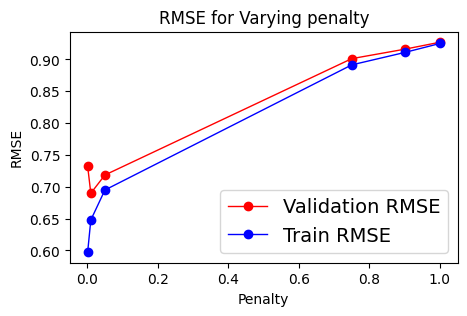

In [53]:
#Polynomial linear regression with lasso regularization
alpha = [0.001,0.01,0.05,0.75,0.9,1 ]
coefs = []
# Partition the training data into train and validation subsets for this experiment
X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Two lists to store train and validation MSE values for various models of varying complexity
mse_train_list, mse_validation_list = [], []
for a in alpha:
    # Create a pipeline object: first add polynomials, then standardize, finally create Linear Regression model
    model = make_pipeline(PolynomialFeatures(3, include_bias=False), Lasso(alpha = a,max_iter=10000))
    # Train the model
    model.fit(X_train_new, y_train_new)
    # Make prediction
    y_train_predicted = model.predict(X_train_new)
    y_validation_predicted = model.predict(X_validation)
    # Compute MSE and add to the list
    mse_train_list.append(np.sqrt(mean_squared_error(y_train_new, y_train_predicted)))
    mse_validation_list.append(np.sqrt(mean_squared_error(y_validation, y_validation_predicted)))
# Plot RMSE values for varying polynomial degree
plt.figure(figsize=(5, 3))
plt.plot(alpha, np.sqrt(mse_validation_list), "ro-", alpha=1.0, linewidth=1.0, label="Validation RMSE")
plt.plot(alpha, np.sqrt(mse_train_list), "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")
plt.legend(loc="best", fontsize=14)
plt.xlabel("Penalty")
plt.ylabel("RMSE")
plt.title("RMSE for Varying penalty")
plt.show()

In [54]:
#prediction for polynomial lasso regularization
y_pred = model.predict(X_test)
poly_lin_lasso = np.sqrt(mean_squared_error(y_test,y_pred))

**Question-F Part 2- Poly -Enet**

Text(0.5, 1.0, 'RMSE for Varying penalty (alpha)')

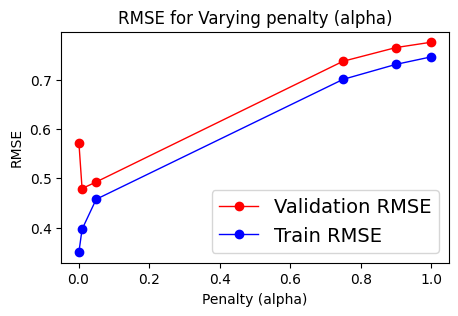

In [57]:
# Polynomial linear regression with ElasticNet regularization
alpha = [0.001, 0.01, 0.05, 0.75, 0.9, 1]
coefs = []
# Partition the training data into train and validation subsets for this experiment
X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Two lists to store train and validation MSE values for various models of varying complexity
mse_train_list, mse_validation_list = [], []
for a in alpha:
    # Create a pipeline object: first add polynomials, then standardize, finally create ElasticNet Regression model
    model = make_pipeline(PolynomialFeatures(3, include_bias=False), ElasticNet(alpha=a, l1_ratio=0.5, max_iter=10000))
    # Train the model
    model.fit(X_train_new, y_train_new)
    # Make prediction
    y_train_predicted = model.predict(X_train_new)
    y_validation_predicted = model.predict(X_validation)
    # Compute MSE and add to the list
    mse_train_list.append(mean_squared_error(y_train_new, y_train_predicted))
    mse_validation_list.append(mean_squared_error(y_validation, y_validation_predicted))
# Plot RMSE values for varying penalty (alpha)
plt.figure(figsize=(5, 3))
plt.plot(alpha, np.sqrt(mse_validation_list), "ro-", alpha=1.0, linewidth=1.0, label="Validation RMSE")
plt.plot(alpha, np.sqrt(mse_train_list), "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")
plt.legend(loc="best", fontsize=14)
plt.xlabel("Penalty (alpha)")
plt.ylabel("RMSE")
plt.title("RMSE for Varying penalty (alpha)")


In [58]:
#prediction for polynomial enet regularization
y_pred = model.predict(X_test)
poly_lin_enet = np.sqrt(mean_squared_error(y_test,y_pred))

**Question-F Part 3- Poly -Hyperparameter tuning**

In [65]:
# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'alpha': [0.1, 0.01,0.001],
              'l1_ratio': [1,0.2,0.5], 'max_iter':[100, 500],'eta0': [0.01, 0.001],
              'loss': ['squared_error']}
sgd = SGDRegressor(penalty='elasticnet')
sgd_cv = GridSearchCV(sgd, param_grid, scoring='neg_mean_absolute_error', cv=4, verbose=1, n_jobs=-1)
sgd_cv.fit(X_train, y_train)
params_optimal_sgd = sgd_cv.best_params_
print("Best Score (root mean squared error): %f" % np.sqrt(-sgd_cv.best_score_))
print("Optimal Hyperparameter Values: ", params_optimal_sgd)
print("\n")
y_pred=sgd_cv.predict(X_test)
sgd_hyper_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Best Score (root mean squared error): 0.634310
Optimal Hyperparameter Values:  {'alpha': 0.001, 'eta0': 0.01, 'l1_ratio': 0.2, 'loss': 'squared_error', 'max_iter': 100}




In the hyperparameter tuning process using GridSearchCV for the SGDRegressor model, several combinations of hyperparameters were explored. The hyperparameters included alpha (regularization strength), learning rate, l1_ratio (mixing parameter for elastic net), max_iter (maximum number of iterations), eta0 (initial learning rate), and loss function.

The best combination of hyperparameters was found to be:

Alpha: 0.01
Eta0 (Initial Learning Rate): 0.01
L1_ratio: 0.2
Learning Rate: Constant
Loss Function: Squared Error
Max Iterations: 100
This configuration resulted in the best performance, with a negative mean squared error of approximately 0.634310 on the validation data.

As for batch size, it's important to note that SGDRegressor doesn't have a traditional batch size parameter like neural networks. Instead, it updates the model's weights after each individual training example (online learning). The learning rate and initial learning rate (eta0) were tuned to optimize convergence.

G Part 1 : Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance. [10 points]

G part 1 : Prediction on the Test Labels- 5 pts, Reporting the Evaluation Metric-2 pts

In [67]:
#prediction for ridge regression

y_pred = ridge.predict((X_test))
lin_ridge = np.sqrt(mean_squared_error(y_test,y_pred))

In [63]:
#prediction for lasso regression
y_pred = lasso.predict(X_test)
lin_lasso = np.sqrt(mean_squared_error(y_test,y_pred))

**Few others predictions have been made after models are trained**

In [76]:
score_names= ['lin_reg', 'ridge_reg', 'lasso_reg', 'lin_reg_enet', 'sgd_reg', 'poly_reg',
       'poly_reg_ridge', 'poly_reg_lasso', 'poly_reg_enet', 'poly_reg_sgd']
scores =[lin_reg_rmse,lin_ridge,lin_lasso,lin_reg_rmse,sgd_reg,poly_lin_reg,poly_lin_ridge,poly_lin_lasso,poly_lin_enet,sgd_hyper_rmse]

In [77]:
df_score = pd.DataFrame(data = [score_names,scores])
df_score

0          1          2             3         4         5  \
0  lin_reg  ridge_reg  lasso_reg  lin_reg_enet   sgd_reg  poly_reg   
1  0.57867   0.593984   1.115961       0.57867  0.577174  4.157272   

                6               7              8             9  
0  poly_reg_ridge  poly_reg_lasso  poly_reg_enet  poly_reg_sgd  
1        0.644667        0.880261       0.788359      0.578646

**Question-G Part 2- Summary and future work**

The table summarizes the performance metrics, RMSE (Root Mean Squared Error), for various regression models. Below is a brief interpretation of the results and proposed future improvements:

1. **lin_reg**: This is linear regression model. It has a relatively low RMSE of 0.57867, indicating decent predictive performance.

2. **ridge_reg**: This Ridge regression model. It has a slightly higher RMSE of 0.593984 compared to linear regression, suggesting some regularization might be impacting predictive accuracy.

3. **lasso_reg**: This Lasso regression model. It has a higher RMSE of 1.115961, indicating that the Lasso regularization might be overly penalizing some features, leading to reduced predictive accuracy.

4. **lin_reg_enet**: This Elastic Net regression. It has the same RMSE as 'lin_reg,' suggesting that the elastic net might not be impacting the model significantly in this case.

5. **sgd_reg**: This is Stochastic Gradient Descent (SGD) regression. It has a relatively low RMSE of 0.577174, similar to 'lin_reg,' indicating good performance.

6. **poly_reg**: This is polynomial regression model. It has a substantially higher RMSE of 4.157272, suggesting that the model might be overfitting the data.

7. **poly_reg_ridge**: Polynomial regression with Ridge regularization has an RMSE of 0.644667, which is lower than the unregularized polynomial regression. It's a better-performing polynomial model.

8. **poly_reg_lasso**: Polynomial regression with Lasso regularization has an RMSE of 0.880261, which is also better than unregularized polynomial regression but not as good as Ridge regularization.

9. **poly_reg_enet**: Polynomial regression with Elastic Net regularization has an RMSE of 0.788359, which is competitive with Ridge and Lasso regularization.

10. **poly_reg_sgd**: Polynomial regression with SGD optimization has an RMSE of 0.578646, similar to 'lin_reg' and 'sgd_reg,' indicating good performance.

**Proposed Future Improvements:**

1. Further Hyperparameter Tuning: Experiment with different hyperparameter settings for regularization models (Ridge, Lasso, Elastic Net) to see if better combinations can improve predictive accuracy.

2. Feature Engineering: Consider additional feature engineering techniques to potentially enhance the performance of polynomial regression models and reduce overfitting.

3. Model Ensemble: Explore ensemble techniques like stacking or bagging to combine the strengths of different models for better predictive accuracy.

4. Cross-Validation: Implement robust cross-validation strategies to ensure the reported performance metrics are consistent and reliable.

5. Data Preprocessing: Carefully preprocess and clean the data to handle outliers, missing values, and scale features appropriately, which can have a significant impact on model performance.

6. Feature Selection: Analyze feature importance and consider feature selection methods to identify the most relevant predictors for the target variable.

7. Additional Models: Experiment with other regression algorithms or machine learning models to find the one that best fits the dataset.

Overall, a comprehensive analysis of the dataset, fine-tuning of models, and consideration of additional techniques can lead to improved predictive performance.